# Day 32: Introduction to Bagging and Random Forests

Ensemble learning techniques such as Bagging (Bootstrap Aggregation) and Random Forests stand out for their efficacy in improving model performance.

**Bagging**, short for Bootstrap Aggregation, is an ensemble technique in which multiple samples of the training data are taken with replacement (bootstrap samples), a model is trained on each of these samples, and their predictions are then aggregated (usually by voting for classification or averaging for regression).

**Random Forests** are an extension of the bagging technique, applied specifically to decision trees, where, in addition to bootstrapping samples, each tree in the forest is allowed to choose from a random subset of features when splitting nodes. This adds an extra layer of diversity to the ensemble, further reducing variance without significantly increasing bias.

## Importance

The significance of Bagging and Random Forests in machine learning cannot be overstated. These methods play a critical role in:

- **Reducing overfitting:** by averaging multiple models, the ensemble can cancel out the noise and reduce the chance of capturing spurious relationships in the training data.
- **Improving model stability and accuracy:** ensemble methods often yield more accurate predictions than any single model, especially for complex problems.
- **Versatility:** these techniques can be applied to both regression and classification problems, making them widely applicable across various domains.

By diving deep into these ensemble methods, you will not only understand the mechanics behind these powerful techniques but also how to implement them effectively to solve real-world problems.



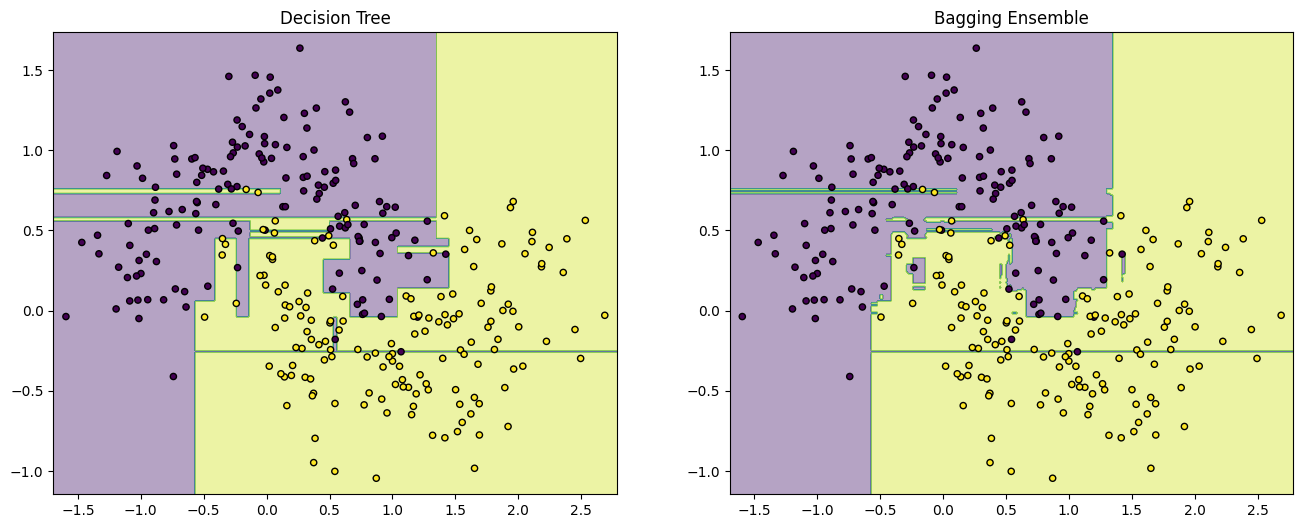

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Generate synthetic dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Create and train a single decision tree
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X, y)

# Create and train a bagging classifier based on decision trees
bagging_trees = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
bagging_trees.fit(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    ax.set_title(title)

# Create figure for plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot decision boundaries
plot_decision_boundary(single_tree, X, y, axs[0], 'Decision Tree')
plot_decision_boundary(bagging_trees, X, y, axs[1], 'Bagging Ensemble')

# Display the plot
plt.show()

# Interpretation
# The left plot shows the decision boundary created by a single decision tree. Notice how it attempts to capture every
# detail in the data, which could lead to overfitting. 
# The right plot, on the other hand, represents the decision boundary by aggregating 100 decision trees through Bagging.
# The boundary is smoother and likely more generalizable indicating how ensemble methods can enhance model performance by
# reducing variance and improving decision boundaries.



# Ensemble Learning

In the vast and dynamic field of machine learning, Ensemble Learning represents a powerful class of models that harnesses the strengths of multiple learning algorithms to achieve greater predictive performance than any constituent algorithm could alone. This technique is particularly adept at improving the robustness and accuracy of predictions by effectively combining the diverse insights from various models.

## Definition

**Ensemble Learning** refers to the process of generating several models, known as **base learners**, and then combining their predictions in a certain way to create a final, aggregated model known as the **meta-learner**. The methods to combine these models can be broadly categorized into two:

- **Voting:** Used primarily in classification problems, voting can be "hard", where the prediction is the one that receives the majority of the votes, or "soft", where probabilities for each class are averaged to get the final prediction.
  
  - Hard Voting: If there are three classifiers and their predictions for a sample are 0, 1, and 1, respectively, the final prediction would be 1, as it gets the majority of votes.
  
  - Soft Voting: For the same classifiers, if the probability estimates for class 1 are 0.2, 0.6, and 0.8, the final prediction is averaged to $(0.2 + 0.6 + 0.8) / 3 = 0.53$, predicting class 1 for a cutoff of 0.5.

- **Averaging:** Primarily used in regression problems, the predictions from all models are simply averaged to obtain the final prediction. If models predict values of 3.5, 4.0, and 5.5, the final aggregate prediction is $(3.5 + 4.0 + 5.5) / 3 = 4.33$.

The principle that empowers ensemble methods is rooted in statistical theory—mainly, the idea that combining the outputs of several models can reduce the overall variance of the predictions (for bagged models), or reduce bias and variance together (for models like boosting), without incurring substantial increases in complexity.

## Applications

Ensemble methods can be applied across a spectrum of machine learning tasks, from heart disease prediction using classification to predicting housing prices through regression. However, the prerequisite for their successful application lies in the diversity of the base learners; the more diverse the predictions of the base models, the higher the potential for error reduction by the ensemble.

Techniques like Bagging and Random Forest work by introducing randomness into the model training process to ensure a diverse set of learners. This is pivotal because if all models are identical, the ensemble would merely replicate the errors of a single model, negating any benefit of aggregation.

Yet, these powerful techniques come with their caveats. The assumption that model errors are uncorrelated and therefore will cancel each other out may not always hold, particularly in cases where models are trained on very similar feature sets or data instances. Implementing these methods also requires careful tuning of parameters and thoughtful consideration of the trade-offs between computational efficiency and prediction accuracy.

Understanding and applying Ensemble Learning methods, especially Bagging and Random Forests, requires a grasp of not just the mechanics of individual models but also how to effectively combine them to mitigate their individual weaknesses and enhance their strengths.

## Transition to praxis

To practically implement these concepts, we will delve into Random Forests as a case study of ensemble learning. Random Forests are an amalgamation of decision trees, combined through the method of bootstrap aggregation, or bagging, to enhance stability and accuracy. In our forthcoming code example, we'll employ `sklearn`'s `RandomForest` classifier and regressor to tackle classification and regression problems, illustrating how these ensemble methods can be applied to real-world datasets. We will also touch upon how parameter tuning affects model performance and how to visually interpret the results.



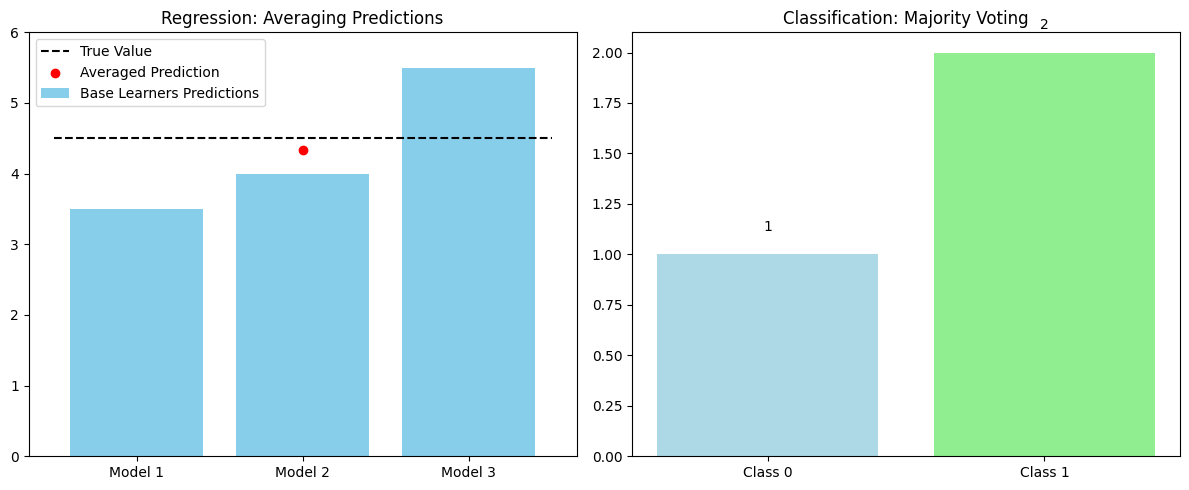

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Preparing mock predictions from three base learners and the true value for a regression problem
base_learner_predictions = np.array([3.5, 4.0, 5.5])  # Mock predictions from three different models
true_value = 4.5  # The true value for demonstration purposes

# Averaging the predictions for regression
average_prediction = np.mean(base_learner_predictions)

# Preparing mock predictions for a classification problem (3 classifiers, 2 classes)
class_0_votes = np.array([1, 0, 0])  # Votes for class 0
class_1_votes = np.array([0, 1, 1])  # Votes for class 1
# Count votes (assume classes are 0 and 1)
votes = [sum(class_0_votes), sum(class_1_votes)]
predicted_class = np.argmax(votes)  # The predicted class from majority voting

# Visualization code
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Subplot for regression
axs[0].bar(range(len(base_learner_predictions)), base_learner_predictions, color='skyblue', label='Base Learners Predictions')
axs[0].plot([-0.5, 2.5], [true_value, true_value], 'k--', label='True Value')
axs[0].scatter([1], [average_prediction], color='red', zorder=5, label='Averaged Prediction')
axs[0].set_xticks(range(len(base_learner_predictions)))
axs[0].set_xticklabels(['Model 1', 'Model 2', 'Model 3'])
axs[0].set_title('Regression: Averaging Predictions')
axs[0].legend()
axs[0].set_ylim(0, 6)

# Subplot for classification
categories = ['Class 0', 'Class 1']
axs[1].bar(categories, votes, color=['lightblue', 'lightgreen'])
axs[1].set_title('Classification: Majority Voting')
for i, v in enumerate(votes):
    axs[1].text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Interpretation
# The left plot shows how averaging is used in regression problems to combine predictions from multiple models.
# The right plot demonstrates a simple majority voting system among three models in a classification task.



# Bootstrap Aggregation (Bagging)

In ensemble learning, one of the key strategies to enhance the performance of a model is through Bootstrap Aggregation, commonly known as Bagging. This technique leverages the statistical bootstrap mechanism to generate multiple subsets from the original dataset. These subsets are then used to train multiple models, and their predictions are aggregated to produce a final outcome. This section will delve into the process of bootstrap sampling and its pivotal role in the bagging process.

## Definition

**Bootstrap Sampling** is a statistical method to estimate the distribution of a sample by sampling with replacement from the actual data. It allows us to approximate the variability of our estimator (be it the mean, median, or any other), giving us insight into its distribution.

The method involves randomly selecting observations from the dataset to create many bootstrap samples. These samples, although smaller, mirror the true distribution of the original dataset closely. Each of these bootstrap samples is used to generate a model, the results of which are then aggregated to form the final prediction.

Mathematically, given a dataset of size $N$, we create new datasets, each of size $N'$, by randomly sampling observations from the original dataset with replacement. The predictions from models trained on these boostrap samples are aggregated (usually by averaging) to form the final prediction:

$$ \hat{y} = \frac{1}{B} \sum_{b=1}^{B} \hat{f}^{*b}(x) $$

Where:
- $\hat{y}$ is the aggregated prediction,
- $B$ is the number of bootstrap samples,
- $\hat{f}^{*b}(x)$ is the prediction from the model trained on the $b^{th}$ bootstrap sample.

## Applications

Bagging can be particularly effective in reducing the variance of a prediction model without increasing bias substantially. This makes it incredibly valuable for complex models that are prone to overfitting, such as deep neural networks, decision trees, and other high-variance models.

- **In Decision Trees and Random Forests:** Bagging is integral to Random Forests where it is used to create diverse trees by training on different bootstrap samples of the dataset.
- **In Reducing Overfitting:** By averaging several models, the effects of noisy data are diluted, substantially reducing overfitting.
- **In Enhancing Stability:** Models built on different subsets of the data reduce the risk of a particular anomaly affecting the model's performance.

However, it's essential to note that while bagging excels at reducing variance, it might not be as effective if the underlying models are biased. Highly biased models would still result in a biased ensemble, even after aggregation.

Let's put this into practice with `sklearn`. Familiarity with `DecisionTreeClassifier` and `BaggingClassifier` will be beneficial as we explore how bagging can be applied to improve the stability and accuracy of decision tree models. We'll also see how to visualize the effects of bagging on model performance, leveraging `matplotlib` for visualization. Understanding these concepts in action will provide a clearer picture of the mechanism and benefits of bootstrap aggregation in ensemble learning.


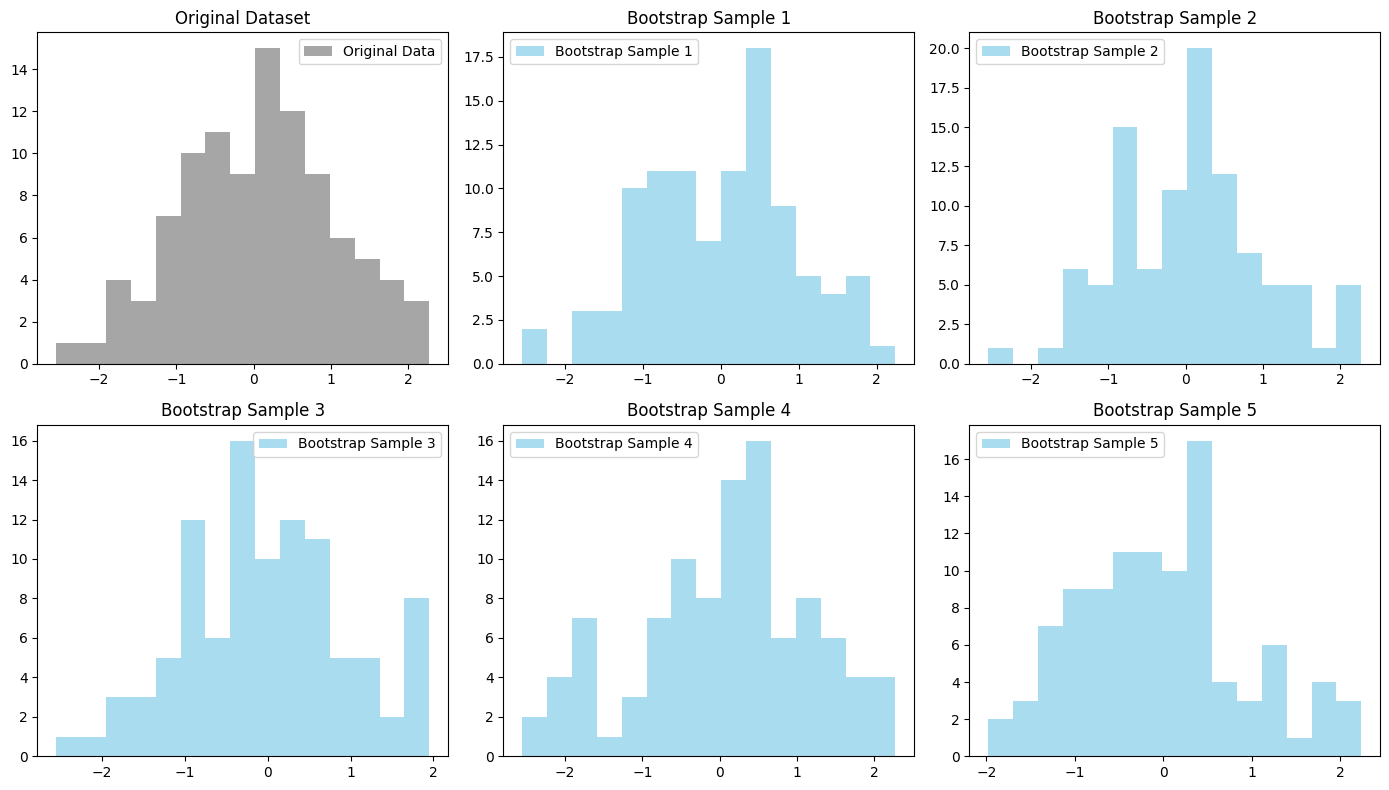

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Generating a synthetic dataset
np.random.seed(0) # For reproducibility
original_data = np.random.normal(loc=0, scale=1, size=100) # 100 data points from a normal distribution

# Generating bootstrap samples
bootstrap_samples = [resample(original_data, replace=True, n_samples=len(original_data), random_state=i) 
                     for i in range(5)] # Generate 5 bootstrap samples

# Visualization
plt.figure(figsize=(14, 8))

# Plotting the original dataset
plt.subplot(2, 3, 1) # Arrange plots in 2 rows, 3 columns, this is the 1st
plt.hist(original_data, bins=15, color='grey', alpha=0.7, label='Original Data')
plt.title('Original Dataset')
plt.legend()

# Plotting bootstrap samples
for i, bootstrap_sample in enumerate(bootstrap_samples, start=2): # Start indexing from 2
    plt.subplot(2, 3, i)
    plt.hist(bootstrap_sample, bins=15, color='skyblue', alpha=0.7, label=f'Bootstrap Sample {i-1}')
    plt.title(f'Bootstrap Sample {i-1}')
    plt.legend()

plt.tight_layout()
plt.show()

# Interpretation:
# The histograms illustrate how each bootstrap sample, while distinct from one another and the original dataset,
# maintains a similar distribution. This demonstrates the concept of bootstrap sampling, where although the samples
# are created through random sampling with replacement, they preserve the characteristics of the original dataset,
# enabling effective estimation of model variability and ensemble learning through bagging.



# Random Forests

Building on the ensemble learning techniques discussed, Random Forests emerge as a powerful extension of bagging, tailored for decision trees. This approach not only leverages the strength of multiple models but introduces randomness in feature selection, further enhancing its ability to combat overfitting while maintaining a high prediction accuracy. Random Forests thrive by generating a multitude of decision trees, each trained on a random subset of the training data and features, then combining their outputs to yield a final verdict. This versatility makes Random Forests a go-to algorithm for handling a plethora of machine learning tasks.

## Definition

### Bagging Recap
In bagging, models are independent of one another and are trained on random subsets of the data. Given $n$ models, the final output ($\hat{y}$) can be represented as:
$$
\hat{y} = \frac{1}{n} \sum_{i=1}^{n} \hat{y}_i
$$
where $\hat{y}_i$ is the prediction of the $i^{th}$ model.

### Introduction to Random Forests
**Random Forests** improve upon the idea of bagging by incorporating feature randomness. In the context of decision trees, each tree in a Random Forest is trained on a random subset of the features at each split, in addition to the bootstrapping of the data samples. This process can be broken down as follows:
1. For each tree, select a random sample of the data with replacement (bootstrap sample).
2. At each node of the tree, select a random subset of features out of the total features and determine the best split only using this subset.
3. Grow the tree to maximum size without pruning.

The final prediction is made by averaging the predictions (for regression) or by majority voting (for classification) from all trees.

## Applications

Random Forests are particularly well-suited for:
- **Classification and Regression Tasks:** Whether predicting a continuous value or categorizing into classes, Random Forests are highly versatile.
- **Feature Importance Evaluation:** Random Forests can be used to gauge the importance of features within the dataset, providing insights that might be critical for model refinement.
- **Handling Large Data with Higher Dimensionality:** Given its inherent method of feature selection, Random Forests can manage datasets with a large number of features without a significant loss in model performance.

However, despite their robustness, Random Forests can be computationally intensive and may not perform well on very high-dimensional sparse data, such as text data.

### Transition to Praxis

Moving to practical application, leveraging `sklearn`'s `RandomForestClassifier` and `RandomForestRegressor` will allow you to easily implement Random Forest models. We'll walk through setting up a model, fitting it with training data, and evaluating its performance. Understanding `sklearn`'s model parameters, such as `n_estimators` (number of trees) and `max_features` (the number of features to consider for each split), will be crucial for optimizing your Random Forest model.



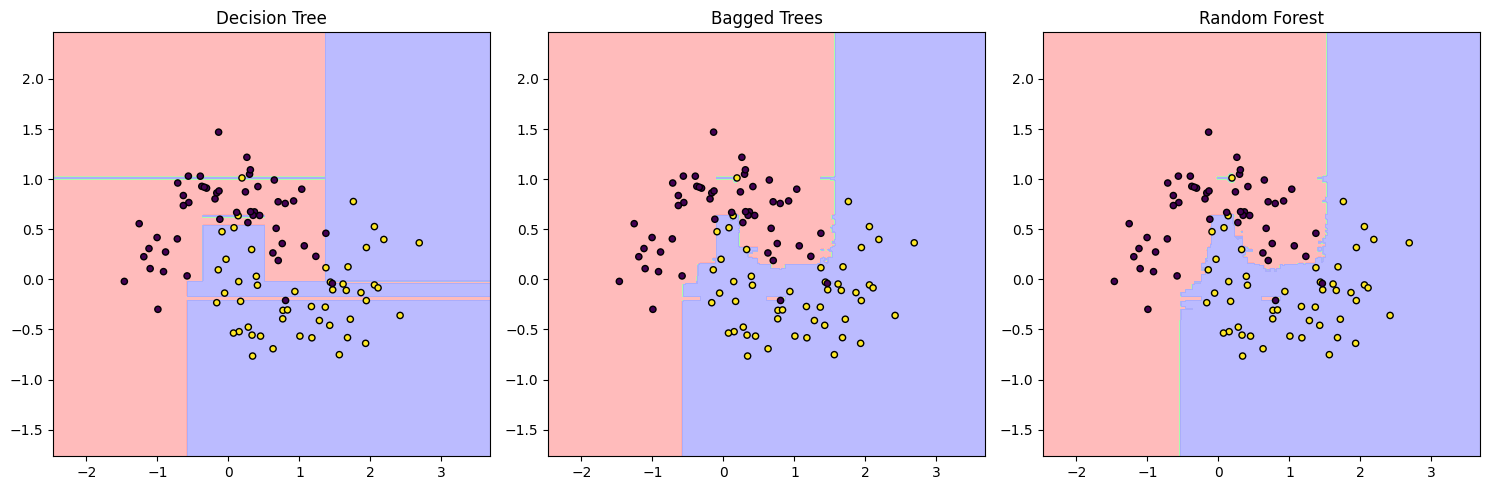

In [4]:
# Necessary library imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Generating synthetic data
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

# Models setup
decision_tree = DecisionTreeClassifier(random_state=42)
bagged_trees = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting models
decision_tree.fit(X, y)
bagged_trees.fit(X, y)
random_forest.fit(X, y)

# Plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for clf, title, ax in zip([decision_tree, bagged_trees, random_forest], 
                          ['Decision Tree', 'Bagged Trees', 'Random Forest'], 
                          ax.flatten()):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Interpretation: The visual representation shows the complexity and generalization capabilities 
# of each approach. The decision tree boundary is irregular, showing signs of overfitting. Bagged 
# trees average multiple decision trees' predictions, resulting in a smoother boundary. The Random 
# Forest further smoothens the decision boundary by introducing randomness in feature selection, 
# potentially offering the best generalization among the three.



## Exercise For The Reader

In this exercise, you will apply the concepts of Bagging and Random Forests to a practical problem using Python. You'll start with a dataset, apply bootstrap sampling to generate multiple datasets, train decision tree models on these generated datasets, and finally, aggregate their predictions to make a final decision. This exercise will help you understand how Bagging and Random Forests can be implemented to improve model performance.

### Bootstrap Sampling & Training

**Definition:** Bootstrap sampling is a method of resampling with replacement from a dataset. In the context of Bagging, each bootstrap sample serves as a separate training set for an individual model within the ensemble.

1. **Generate Bootstrap Samples:** From a sklearn toy dataset, generate `N` bootstrap samples. Each sample should be of the same size as the original dataset, but note that some instances will appear multiple times while others might not appear at all, due to the sampling with replacement.
2. **Train Decision Trees:** For each bootstrap sample, train a Decision Tree. Use the sklearn library's `DecisionTreeClassifier` for this purpose. 

### Aggregating Predictions

**Definition:** Once all individual models (decision trees, in this case) are trained on their respective bootstrap samples, their predictions are aggregated to make a final prediction. For classification tasks like this one, a simple majority vote is commonly used.

1. **Collect Predictions:** Use each of your trained Decision Tree models to make predictions on a test set. Save the predictions from each model.
2. **Aggregate Predictions:** For each instance in the test set, count the votes for each class across all models. The class with the majority votes becomes the final prediction for that instance.

### Evaluation

Finally, evaluate the performance of your aggregated model on a test set. Compare the accuracy of your ensemble model against a single Decision Tree model trained on the original dataset without bootstrapping. This comparison will help you appreciate the power of ensemble methods like Bagging and Random Forests.

### Deliverables

- Code for generating bootstrap samples.
- Code for training Decision Tree models on these samples.
- Code for aggregating predictions and making a final decision.
- An evaluation of the ensemble model's performance compared to a single Decision Tree model.



In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def bootstrap_sample(X, y):
    """Generate a bootstrap sample from the datasets X and y."""
    n_samples = X.shape[0]
    indices = np.random.choice(np.arange(n_samples), size=n_samples, replace=True)
    return X[indices], y[indices]

def train_decision_trees(X, y, n_trees):
    """Train multiple decision tree classifiers on bootstrap samples generated from X and y."""
    trees = []
    for _ in range(n_trees):
        X_sample, y_sample = bootstrap_sample(X, y)
        tree = DecisionTreeClassifier(random_state=42)
        tree.fit(X_sample, y_sample)
        trees.append(tree)
    return trees

def aggregate_predictions(trees, X):
    """Aggregate predictions from a list of trained trees."""
    predictions = np.array([tree.predict(X) for tree in trees])
    # Use mode to find the most common prediction for each sample
    mode_predictions, _ = mode(predictions, axis=0)
    # Extract the mode predictions array properly
    return mode_predictions

# Parameters
n_trees = 100

# Training and Prediction
trees = train_decision_trees(X_train, y_train, n_trees)
y_pred = aggregate_predictions(trees, X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the ensemble model: {accuracy:.2f}")

# For comparison, train a single decision tree model
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)
y_pred_single = single_tree.predict(X_test)
accuracy_single = accuracy_score(y_test, y_pred_single)
print(f"Accuracy of a single decision tree: {accuracy_single:.2f}")

# Visualization - This is a placeholder for a more advanced visualization that requires custom implementation.
#plt.figure(figsize=(12, 6))
#plt.title("Placeholder for Decision Boundaries Visualization")
# Note: Implementing a method to plot the decision boundary of a classifier is advanced and beyond the scope of this snippet.
#plt.show()


Accuracy of the ensemble model: 1.00
Accuracy of a single decision tree: 1.00


Good luck!